From the "Supersolid symmetry breaking from compressional oscillations in a dipolar quantum gas" paper (link here [https://arxiv.org/abs/1906.02791](https://arxiv.org/abs/1906.02791)), the authors say:

"The equilibrium density configuration is found by fixing the equation parameters to the values available in the experiments, and then evolving the eGPE in imaginary time. We consider $\mathrm{N}=35000$ atoms of ${ }^{162} \mathrm{Dy}$, for which $a_{d d}=130 a_0\left(a_0\right.$ is the Bohr radius). The trapping frequencies are $\omega_{x, y, z}=2 \pi(18.5,53,81) \mathrm{Hz}$, and $a_s$ is changed to tune the value of $\epsilon_{d d}$."



# import modules

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

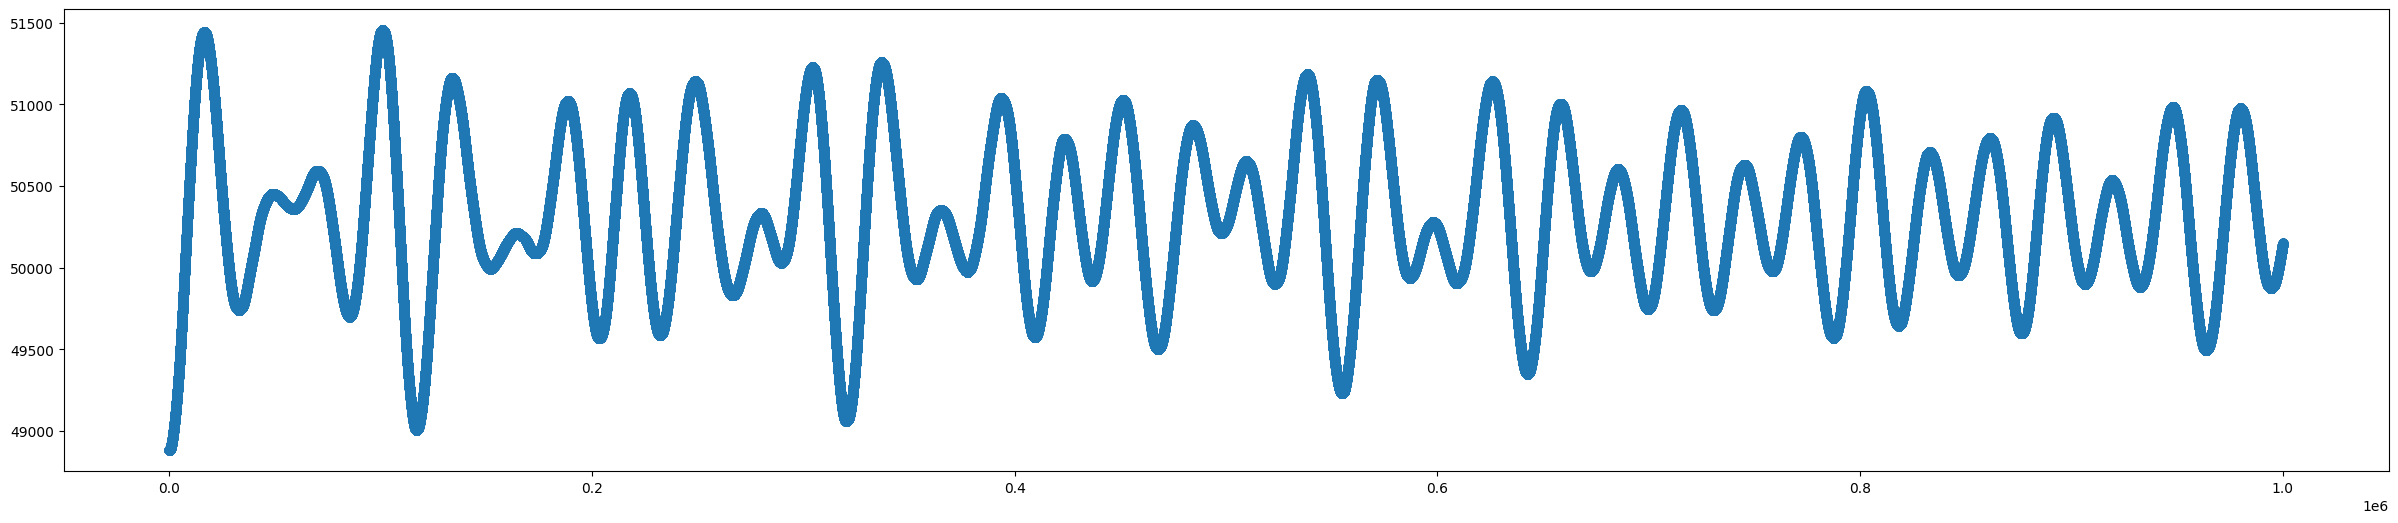

In [14]:
# Load file 2-real-time/snapshots_time_evolution_0/x2.txt
data = np.loadtxt('2-real-time/snapshots_time_evolution_0/x2.txt')
step = data[:,0]
x2 = data[:,1]


plt.figure(figsize=(30, 6))
plt.plot(step, x2, marker='o')

(0.0, 0.001)

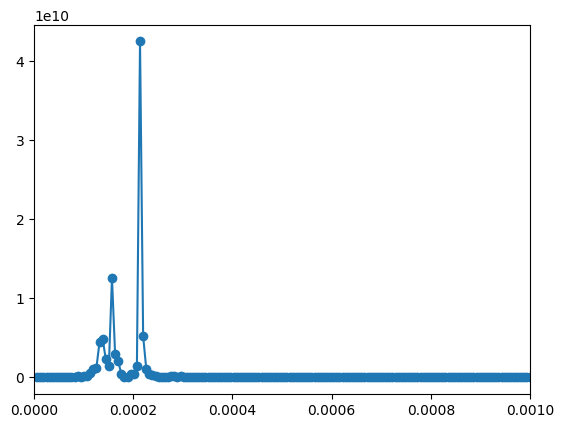

In [22]:
# remove k=0 mode
x2_no_k0 = x2 - np.mean(x2)
x2_no_k0 = x2_no_k0 / np.max(x2_no_k0)


# Calculate the fft of x2, and plot the power spectrum
fft = np.fft.fft(x2_no_k0)
dt = step[1] - step[0]
freq = 2 * np.pi * np.fft.fftfreq(len(x2_no_k0), dt)

# mask out negative frequencies
mask = freq > 0
fft = fft[mask]
freq = freq[mask]

plt.plot(freq, np.abs(fft)**2, marker='o')
plt.xlim(0, 0.001)

In [28]:
power_spectrum = np.abs(fft)**2
idx = (power_spectrum >= np.roll(power_spectrum, 1)) & (power_spectrum >= np.roll(power_spectrum, -1))
local_maxima = power_spectrum[idx]
freqs_local_maxima = freq[idx]
idx = np.argsort(local_maxima)
freqs_local_maxima[idx[-1]], freqs_local_maxima[idx[-2]]

(0.00021362830044410592, 0.00015707963267948965)

In [16]:
# Find two peaks in the power spectrum
# The first peak corresponds to the frequency of the droplet oscillation
# The second peak corresponds to the frequency of the supersolid phase

idx = np.argsort(np.abs(fft)**2)
classical_freq, supersolid_freq = freq[idx[-1]], freq[idx[-2]]
classical_freq, supersolid_freq

(0.00021362830044410592, 0.00015707963267948965)

(0.0, 0.001)

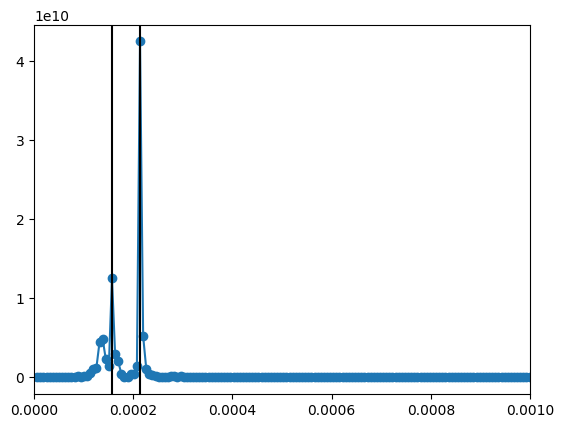

In [33]:
plt.plot(freq, np.abs(fft)**2, marker='o')

plt.axvline(classical_freq, color='black')
plt.axvline(supersolid_freq, color='black')

plt.xlim(0, 0.001)

In [17]:
# save the frequencies to a file in folder 3-analyze-frequency
# if the folder does not exist, create it
import os
if not os.path.exists('3-analyze-frequency'):
    os.makedirs('3-analyze-frequency')

np.savetxt('3-analyze-frequency/frequencies.txt', [classical_freq, supersolid_freq])


# Analyze dependence of frequency with number of points taken

100%|██████████| 60/60 [00:02<00:00, 21.52it/s]


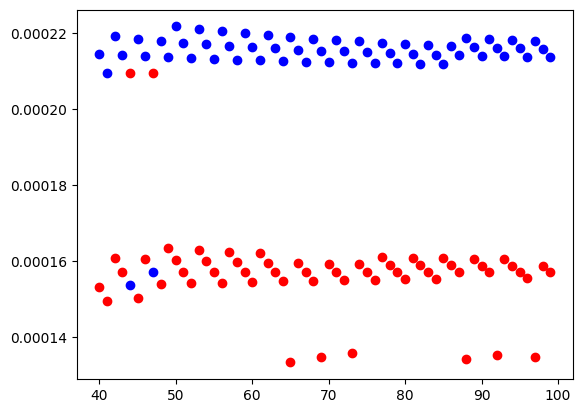

In [32]:
data = np.loadtxt('2-real-time/snapshots_time_evolution_0/x2.txt')
t = data[:,0]
x2 = data[:,1]

dt = t[1] - t[0]

def get_freq(x2, dt):
    # remove k=0 mode
    x2_no_k0 = x2 - np.mean(x2)
    x2_no_k0 = x2_no_k0 / np.max(x2_no_k0)
    # get the frequency from the x2 data
    # x2 is the data
    # dt is the time step
    # returns the frequency in Hz
    # get the fft
    fft = np.fft.fft(x2_no_k0)
    # get the frequencies
    freqs = 2*np.pi*np.fft.fftfreq(len(x2_no_k0), dt)
    
    mask = freqs > 0
    fft = fft[mask]
    freqs = freqs[mask]
    
    
    power_spectrum = np.abs(fft)**2
    idx = (power_spectrum >= np.roll(power_spectrum, 1)) & (power_spectrum >= np.roll(power_spectrum, -1))
    local_maxima = power_spectrum[idx]
    freqs_local_maxima = freqs[idx]
    idx = np.argsort(local_maxima)
    
    classical_freq, supersolid_freq = freqs_local_maxima[idx[-1]], freqs_local_maxima[idx[-2]]
    
    return classical_freq, supersolid_freq


batch_size = 10000
# batch the x2 data into n_steps, so that you have data formatted like this:
# x2_batches = [x2[0:batch_size], x2[0:2*batch_size], x2[0:3*batch_size], ...]
n_steps = len(x2) // batch_size

for i in tqdm(range(40,n_steps)):
    classical_freq, supersolid_freq = get_freq(x2[:(i+1)*batch_size], dt)
    plt.plot(i, classical_freq, marker='o', color='blue')
    plt.plot(i, supersolid_freq, marker='o', color='red')
    
    
